In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# FastTrack

In [6]:
data = pd.read_csv("last_100_frames/Tracking_Result/tracking.txt", sep='\t')


data

,xHead,yHead,tHead,xTail,yTail,tTail,xBody,yBody,tBody,curvature,...,headMinorAxisLength,headExcentricity,tailMajorAxisLength,tailMinorAxisLength,tailExcentricity,bodyMajorAxisLength,bodyMinorAxisLength,bodyExcentricity,imageNumber,id
0,261.96000,280.7210,3.77652,268.60900,276.2500,3.752090,265.66100,278.2320,3.736700,0.000038,...,2.11757,0.865722,5.62314,2.09320,0.928133,9.36522,1.93892,0.978334,0,0
1,5.09839,280.7630,3.10523,11.97250,276.8910,4.049730,8.94000,278.6000,3.679700,0.003459,...,4.07643,0.495744,5.51169,4.13233,0.661734,9.23939,4.24021,0.888474,0,1
2,76.91920,280.7870,5.77469,72.16900,272.0350,5.286860,75.03190,277.3300,5.253640,0.016184,...,4.68829,0.630318,6.89683,3.04915,0.896961,11.51970,4.31303,0.927265,0,2
3,115.24400,257.8850,3.08592,126.98600,257.7590,3.193890,121.11800,257.8240,3.151940,0.000320,...,1.78619,0.945418,6.91832,1.58929,0.973256,13.25920,1.40515,0.994369,0,3
4,88.25330,257.2760,6.11694,75.93470,251.9440,5.722350,83.43480,255.2030,5.853690,0.005385,...,6.60317,0.349070,10.02540,3.69397,0.929643,15.47560,5.66616,0.930562,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,161.55100,281.3550,0.55049,157.79000,283.3920,0.130903,160.42900,281.9640,0.505569,0.000246,...,2.13032,0.759275,2.12575,1.64628,0.632640,4.87540,1.82970,0.926906,99,309
5720,210.30700,234.2720,3.00930,216.83800,235.3570,2.936400,213.86000,234.8600,2.973550,0.000332,...,2.06995,0.821127,4.33108,1.97154,0.890385,7.66639,1.84291,0.970677,99,310
5721,255.41700,171.4140,1.62231,260.93800,181.0900,2.422850,258.32500,176.5040,2.111860,0.003937,...,3.71262,0.783234,8.19250,4.78992,0.811270,13.09280,4.75329,0.931771,99,311
5722,88.21600,153.0220,1.29217,83.12270,160.9430,0.859933,85.44270,157.3360,0.984317,0.001184,...,4.21716,0.500057,6.82575,3.79388,0.831304,11.19330,3.97818,0.934711,99,312


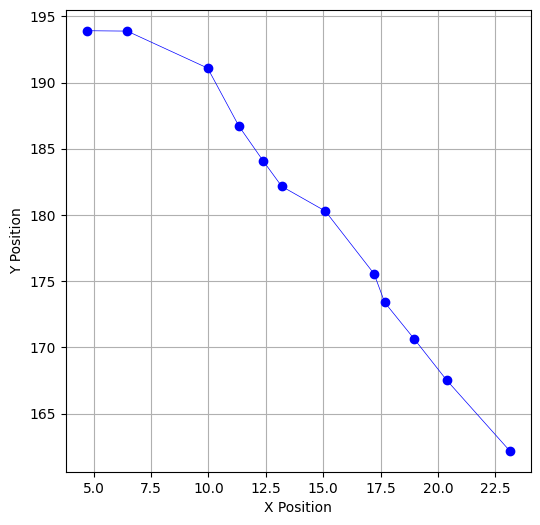

In [7]:
particle_positions = data[data['id'] == 17].sort_values('imageNumber')
X_tm,Y_tm = particle_positions['xBody'],particle_positions['yBody']
# X_tm,Y_tm = NormalizeData(X_tm),NormalizeData(Y_tm)
scale=1
# Step 3: Plot the trajectory
plt.figure(figsize=(6, 6))
plt.plot(X_tm, Y_tm, marker='o', linestyle='-',  lw=0.5,color='b')
# plt.plot(X, Y, marker='o', linestyle='-',  lw=0.5,color='red', label=f'trackmate tracking id {trackmid}')
plt.plot()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
# plt.legend()
plt.show()

# Trackpy

## Without rod-shaped assistance

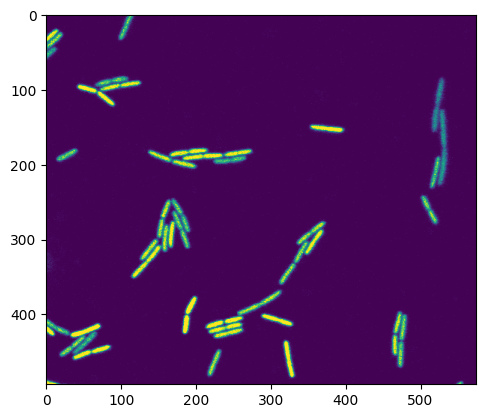

In [3]:
import trackpy as tp
import pims

@pims.pipeline
def gray(image):
    return image[:, :, 0]

# frames = gray(pims.open('last_100_frames/*.png'))
# frames = gray(pims.open('/home/janne/bacteria/data/55_tracks/original_movie_frames/*.tif'))
frames = pims.open('data/55_tracks/original_movie_frames/*.tif')
plt.imshow(frames[0])


# # Locate features in each frame
# f = tp.batch(frames, diameter=11, minmass=100, invert=False)

# # # Link features into trajectories
# t = tp.link_t(f, search_range=5)

# # # Filter trajectories
# t1 = tp.filter_stubs(t, 20)

# # # Plot trajectories
# tp.plot_traj(t1)
# plt.show()

Detection with trackpy

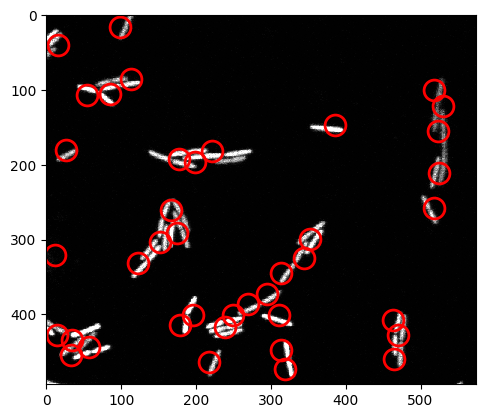

<Axes: >

In [148]:
f = tp.locate(frames[0], 17, invert=True,minmass=2000)
tp.annotate(f,frames[0])
# f.head()

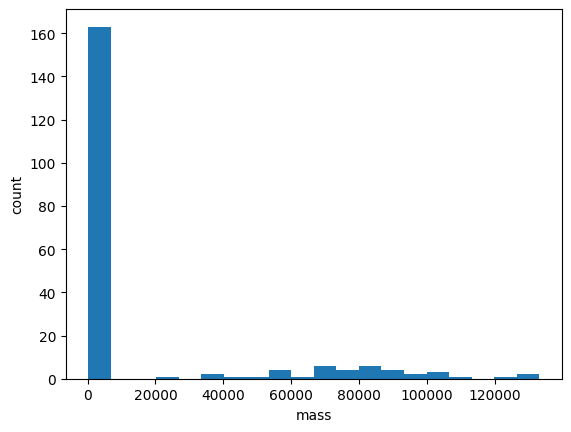

In [95]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

/home/janne/.local/lib/python3.10/site-packages/trackpy/plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

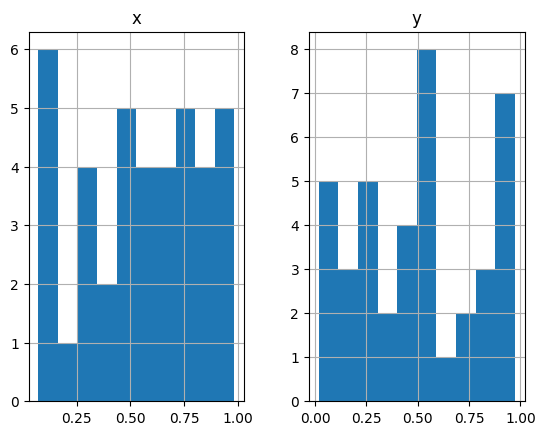

In [97]:
tp.subpx_bias(f)

In [279]:
f = tp.batch(frames, 17, invert=True,minmass=2000)
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,15.891398,98.551891,53399.490358,4.798482,0.441267,710.209946,12756741.0,-0.000930,0
1,40.572191,15.318353,67439.456237,4.525123,0.216192,1005.850046,12726908.0,-0.000744,0
2,85.045422,113.494996,76932.352948,4.459256,0.204882,1272.238928,12721101.0,-0.000717,0
3,99.959564,518.087167,35061.932797,4.728757,0.415944,481.356117,12809534.0,-0.001665,0
4,106.532353,53.852273,80511.863323,4.717167,0.461271,1166.336458,12682777.0,-0.000575,0
...,...,...,...,...,...,...,...,...,...
8014,442.829148,411.991023,55592.964196,4.782549,0.417092,729.329124,12759826.0,NaN,149
8015,450.079282,378.304793,81400.897310,4.692815,0.496917,1178.902467,12714916.0,NaN,149
8016,452.153852,287.566963,82885.828496,4.375125,0.123284,1391.062823,12684439.0,NaN,149
8017,458.971523,459.127425,58473.007554,4.875118,0.413135,744.187363,12764734.0,NaN,149


In [152]:
t = tp.link(f, 10, memory=3)
t.head()
t['particle'].nunique()

Frame 149: 71 trajectories present.


1181

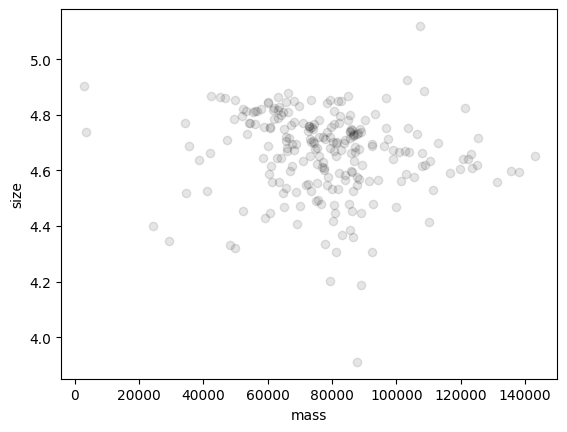

In [153]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

## Rod-shaped assistance 

Particle detection with ImageJ particle analysis and linking (tracking) with trackpy 

150 frames

In [101]:
# frames = pims.open('/home/janne/bacteria/data/55_tracks/original_movie_frames/*.tif')
path = 'data/55_tracks/Result.csv'
results_imagej = pd.read_csv(path)
df = results_imagej
# results_imagej

# import os
# filename = path.split(os.sep)[-1].rstrip('.csv')
# print(f'Processing {path}')
import re
def extract_number(label):
    match = re.search(r't:(\d+)/200', label)
    if match:
        return match.group(1)
    return label 


df['Label'] = df['Label'].apply(extract_number)
# df = df.drop(0)
df1 = df.drop(df.columns[0], axis=1)
df = df1.drop(0)
# df = df.drop(1, axis=1)
df

,Label,Area,X,Y,XM,YM
1,1,1.485,53.548,14.382,53.548,14.382
2,1,7.575,54.224,19.572,54.224,19.572
3,1,3.172,38.649,15.754,38.649,15.754
4,1,1.952,2.865,19.403,2.865,19.403
5,1,2.642,52.704,26.912,52.704,26.912
...,...,...,...,...,...,...
3899,150,5.060,28.621,45.553,28.621,45.553
3900,150,1.634,43.206,45.898,43.206,45.898
3901,150,3.649,5.899,46.254,5.899,46.254
3902,150,2.323,48.150,47.442,48.150,47.442


In [102]:
# df.drop(labels=['Label'], inplace=True, axis=1)
df.rename({'XM': 'x', 'YM': 'y','Label':'frame'}, axis=1, inplace=True)
df

,frame,Area,X,Y,x,y
1,1,1.485,53.548,14.382,53.548,14.382
2,1,7.575,54.224,19.572,54.224,19.572
3,1,3.172,38.649,15.754,38.649,15.754
4,1,1.952,2.865,19.403,2.865,19.403
5,1,2.642,52.704,26.912,52.704,26.912
...,...,...,...,...,...,...
3899,150,5.060,28.621,45.553,28.621,45.553
3900,150,1.634,43.206,45.898,43.206,45.898
3901,150,3.649,5.899,46.254,5.899,46.254
3902,150,2.323,48.150,47.442,48.150,47.442


In [103]:
tp.quiet()  # supress output, makes linking quicker

t = tp.link_df(df, search_range=5.0,memory=3,adaptive_stop=2.0, adaptive_step=0.99)
grouped = t.reset_index(drop=True).groupby('particle')
filtered = grouped.filter(lambda x: x.frame.count() >= 50)
t1 = filtered.set_index('frame',drop=True)
# t1.rename(index={'frame':'frames'},inplace=True)
# t2 = t1.droplevel(0,axis=1)
t1.to_csv('test.csv')
t1 = pd.read_csv('test.csv')
t1

,frame,Area,X,Y,x,y,particle
0,1,1.485,53.548,14.382,53.548,14.382,0
1,1,4.360,48.394,46.184,48.394,46.184,5
2,1,2.642,52.704,26.912,52.704,26.912,6
3,1,1.952,2.865,19.403,2.865,19.403,7
4,1,3.172,38.649,15.754,38.649,15.754,8
...,...,...,...,...,...,...,...
2149,150,6.800,14.963,7.510,14.963,7.510,29
2150,150,2.196,56.191,8.102,56.191,8.102,9
2151,150,1.963,11.124,12.452,11.124,12.452,7
2152,150,7.448,29.953,17.940,29.953,17.940,62


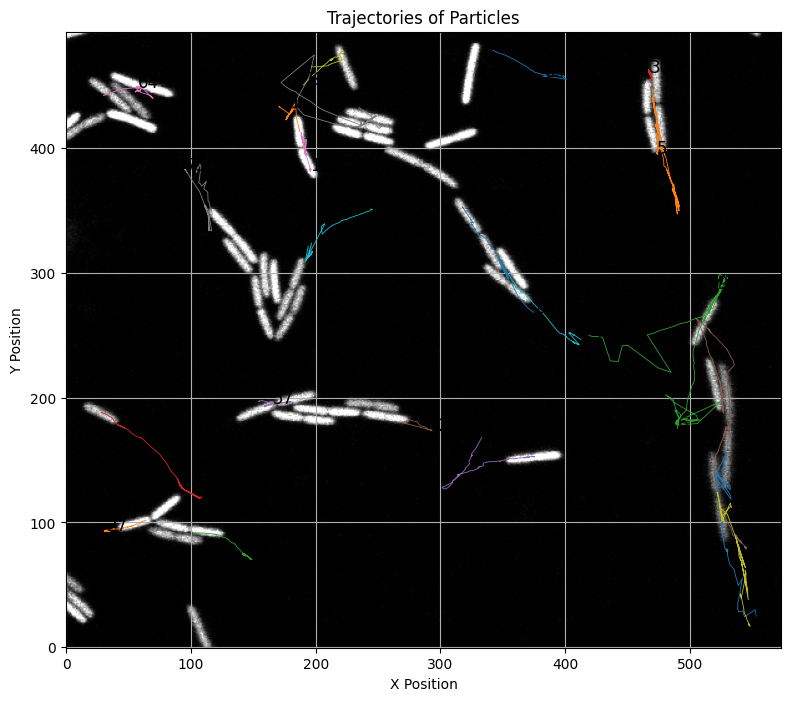

In [104]:
frames = pims.open('data/55_tracks/original_movie_frames/*.tif')

plt.figure(figsize=(10, 8))
ppm = 9.7087
# Plot the trajectories for each particle
for particle_id, group in t1.groupby('particle'):
    plt.plot(group['x']*ppm, group['y']*ppm, marker='o', markersize=0,lw=0.6)
    # Annotate the last position with the particle ID
    plt.text(group['x'].values[-1]*ppm, group['y'].values[-1]*ppm, str(particle_id), fontsize=12)

# Labeling the plot
plt.title('Trajectories of Particles')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.imshow(frames[0],cmap=plt.cm.grey,origin='lower')
# plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

In [105]:


t1['x']= t1['x'].multiply(ppm)
t1['y']= t1['y'].multiply(ppm)


In [46]:
aux = t1[t1['particle'] == 13].sort_values('frame')
aux
# len(aux['frame'].values)

,frame,Area,X,Y,x,y,particle
15,2,1.316,54.181,10.866,526.027075,105.494734,13
25,3,1.316,54.234,10.573,526.541636,102.650085,13
42,5,2.833,53.785,12.775,522.182430,124.028643,13
52,6,1.347,54.206,10.496,526.269792,101.902515,13
62,7,1.485,54.177,10.783,525.988240,104.688912,13
69,8,1.475,54.210,10.649,526.308627,103.387946,13
82,9,1.432,54.228,10.694,526.483384,103.824838,13
92,10,1.443,54.139,10.820,525.619309,105.048134,13
98,11,1.379,54.164,10.752,525.862027,104.387942,13
123,13,1.453,54.129,10.760,525.522222,104.465612,13


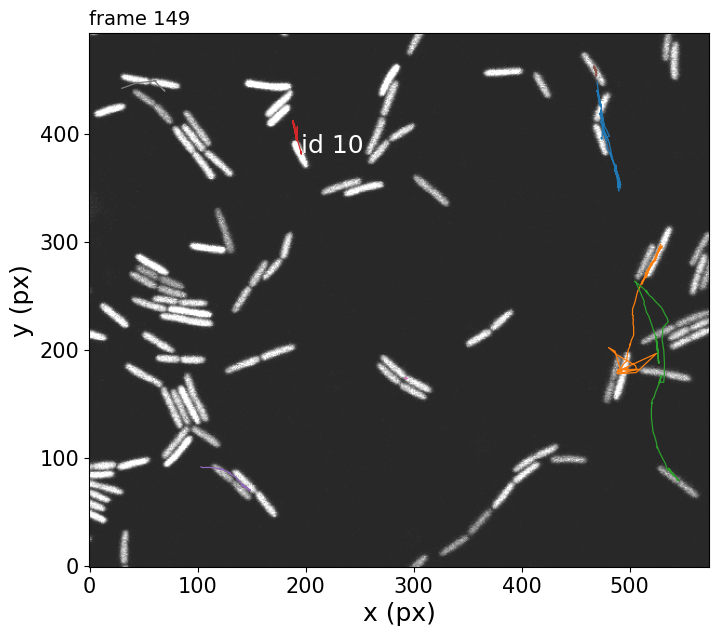

In [50]:
ids = t['particle'].unique()
pairs = [(list(), list()) for _ in range(len(ids))]
x1, y1 = zip(*pairs)
fig_movie, ax_movie = plt.subplots(figsize=(8,8))

# for frame in range(frames):
for frame in range(150):
    ax_movie.clear()
    # print(f'frame {frame}')
    ax_movie.imshow(frames[frame],cmap='gray',alpha=0.85,origin='lower')
    for i,id in enumerate(ids):
        
        traj= t1[t1['particle'] == id].sort_values('frame')
        # X = traj.values[:,4]
        # Y = traj.values[:,5]
        # print(id)
        if (len(traj['frame'].values) < 1) or (frame not in traj['frame'].values):
            continue
        first_frame = min(traj['frame'].values)
        
        # print(traj.values.shape[0],frame)
        
        if (frame < traj.values.shape[0]) and (first_frame <= frame):
            X = traj[traj['frame'] == frame]['x'].values[0]
            Y = traj[traj['frame'] == frame]['y'].values[0]
            x1[i].append(X)
            y1[i].append(Y)
            ax_movie.annotate(f'id {int(id)}',xy=(x1[i][-1],y1[i][-1]),fontsize=18,color='white')
            
        ax_movie.plot(x1[i],y1[i],marker='o', mfc='none',ms=0, lw=0.9)
        # ax_movie.annotate(f'id {int(id)}',xy=(x1[i][-1],y1[i][-1]),fontsize=10)

    ax_movie.set_xlabel(r'x (px)',fontsize=18)
    ax_movie.set_ylabel(r'y (px)',fontsize=18)
    ax_movie.set_title(f'frame {frame}',fontsize=14,loc='left')

    ax_movie.tick_params(axis='both', labelsize=15)
    # plt.tight_layout()
    plt.savefig(f'data/55_tracks/trackpy/frames/frame_{frame:03d}.png',dpi=200)

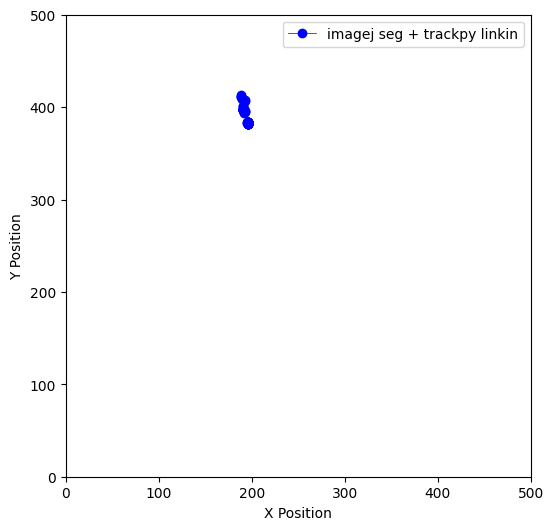

In [106]:
trackpy = 10
# tm = 863
particle_positions_dist = t1[t1['particle'] == trackpy].sort_values('frame')
X_tm,Y_tm = particle_positions_dist['x'],particle_positions_dist['y']

# trackmate_df = np.loadtxt(f'/home/janne/bacteria/data/55_tracks/time_x_y_id/time_x_y_id_{tm}.dat',usecols=(1,2))
# X, Y= trackmate_df[:,0], trackmate_df[:,1]

scale=1
# Step 3: Plot the trajectory
plt.figure(figsize=(6, 6))
plt.plot(X_tm, Y_tm, marker='o', linestyle='-',  lw=0.5,color='b',label='imagej seg + trackpy linkin')
# plt.plot(X,Y, marker='o', linestyle='-',  lw=0.5,color='red', label=f'trackmate tracking')

plt.xlabel('X Position')
plt.ylabel('Y Position')
# plt.grid(True)
plt.legend()
plt.xlim(0,500)
plt.ylim(0,500)
plt.show()

In [107]:

ids = t1['particle'].unique()

def calculate_sd(x, y, x0, y0):
    delta_x = x - x0
    delta_y = y - y0
    sq = delta_x**2 + delta_y**2
    return sq

# Group by 'Track ID' and calculate the initial positions
initial_positions = t1.groupby('particle').first().reset_index()

# Initialize a column for the principal angle
t1['squared displacement'] = 0.0

# Calculate the principal angle for each row
for index, row in t1.iterrows():
    track_id = row['particle']
    initial_row = initial_positions[initial_positions['particle'] == track_id].iloc[0]
    x0, y0 = initial_row['x'],initial_row['y']
    angle = calculate_sd(row['x'], row['y'], x0, y0)
    t1.at[index, 'squared displacement'] = angle

In [109]:
t1.tail()

,frame,Area,X,Y,x,y,particle,squared displacement
2149,150,6.800,14.963,7.510,145.271278,72.912337,29,2137.157522
2150,150,2.196,56.191,8.102,545.541562,78.659887,9,12765.475789
2151,150,1.963,11.124,12.452,107.999579,120.892732,7,10983.747110
2152,150,7.448,29.953,17.940,290.804691,174.174078,62,3.733122
2153,150,2.504,39.533,47.165,383.814037,457.910836,84,2172.078543


In [66]:

ids = t1['particle'].unique()

def calculate_sd(x, y, x0, y0):
    delta_x = x - x0
    delta_y = y - y0
    sq = delta_x**2 + delta_y**2
    return sq

# Group by 'Track ID' and calculate the initial positions
initial_positions = t1[t1['frame'] == 1].set_index('particle')[['x', 'y']]

# Initialize a column for the principal angle
t1['squared displacement'] = 0.0

# Calculate the principal angle for each row
for index, row in t1.iterrows():
    track_id = row['particle']
    if track_id in initial_positions.index:
        x0, y0 = initial_positions.loc[track_id]
        angle = calculate_sd(row['x'], row['y'], x0, y0)
        t1.at[index, 'squared displacement'] = angle

In [100]:
a=t1.sort_values('particle')
min_frame = a[a['particle'] == 12]['frame'].min()
part = a[a['particle'] == 12]
part[part['frame'] == min_frame]

,frame,Area,X,Y,x,y,particle,squared displacement,dt,vx,vy,speed
8,2,9.824,24.193,43.175,234.882579,419.173122,12,0.0,NaN,NaN,NaN,NaN


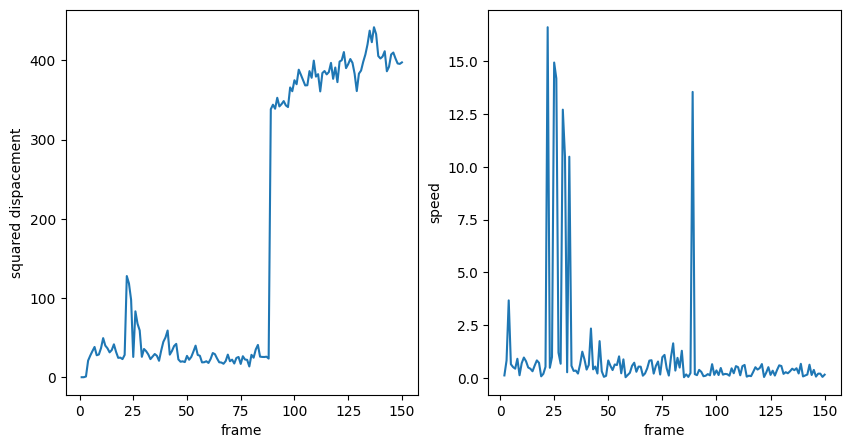

In [112]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

trackpy = 10
quantity = 'squared displacement'
quantity2 = 'speed'
# tm = 863
particle_positions_dist = t1[t1['particle'] == trackpy].sort_values('frame')
time,sq = particle_positions_dist['frame'],particle_positions_dist[quantity]
speed = particle_positions_dist[quantity2]

ax[0].plot(time,sq,label=f'particle {trackpy}')
ax[0].set_xlabel('frame')
ax[0].set_ylabel('squared dispacement')

ax[1].plot(time,speed, label=f'particle {trackpy}')
ax[1].set_xlabel('frame')
ax[1].set_ylabel(quantity2)
plt.show()




In [111]:
t1['dt'] = t1.groupby('particle')['frame'].diff()
t1['vx'] = t1.groupby('particle')['x'].diff() / t1['dt']
t1['vy'] = t1.groupby('particle')['y'].diff() / t1['dt']
t1['speed'] = np.sqrt(t1['vx']**2 + t1['vy']**2)
t1.tail()

,frame,Area,X,Y,x,y,particle,squared displacement,dt,vx,vy,speed
2149,150,6.800,14.963,7.510,145.271278,72.912337,29,2137.157522,1.0,-1.456305,1.330092,1.972300
2150,150,2.196,56.191,8.102,545.541562,78.659887,9,12765.475789,1.0,0.776696,-0.786405,1.105300
2151,150,1.963,11.124,12.452,107.999579,120.892732,7,10983.747110,2.0,-0.223300,0.810676,0.840868
2152,150,7.448,29.953,17.940,290.804691,174.174078,62,3.733122,1.0,2.233001,-1.669896,2.788341
2153,150,2.504,39.533,47.165,383.814037,457.910836,84,2172.078543,1.0,0.757279,0.262135,0.801365


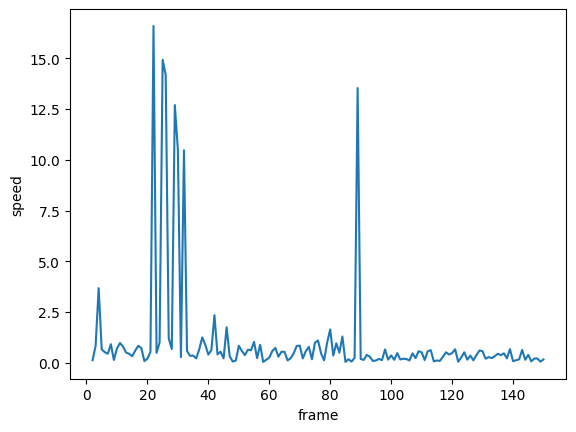

In [71]:
fig, ax = plt.subplots()

trackpy = 10
quantity = 'speed'
# tm = 863
particle_positions_dist = t1[t1['particle'] == trackpy].sort_values('frame')
time,sq = particle_positions_dist['frame'],particle_positions_dist[quantity]

ax.plot(time,sq,label=f'particle {id}')
ax.set_xlabel('frame')
ax.set_ylabel(quantity)

plt.show()

Video 2, um pouco maior

Load and adapt pandas dataframe

In [7]:
path = '/home/janne/bacteria/data/new-videos/video2/trackpy/Results_10-07-2024_1705h.csv'

frames = pims.open('/home/janne/bacteria/data/new-videos/video2/trackpy/*.tif')
results_imagej = pd.read_csv(path)
df = results_imagej
# results_imagej

# import os
# filename = path.split(os.sep)[-1].rstrip('.csv')
# print(f'Processing {path}')
import re
def extract_number(label):
    match = re.search(r't:(\d+)/200', label)
    if match:
        return match.group(1)
    return label 


df['Label'] = df['Label'].apply(extract_number)
df = df.rename(columns={'Label':'frame'})
# df = df.drop(0)
df1 = df.drop(df.columns[0], axis=1)
df = df1.drop(0)
df.rename({'XM': 'x', 'YM': 'y'}, axis=1, inplace=True)
# df = df.drop(1, axis=1)
df

,frame,Area,X,Y,x,y
1,1,3.899,146.955,4.915,146.955,4.915
2,1,2.314,152.996,8.035,152.996,8.035
3,1,2.100,114.389,9.106,114.389,9.106
4,1,2.442,103.440,9.190,103.440,9.190
5,1,5.913,166.257,12.038,166.257,12.038
...,...,...,...,...,...,...
49682,200,2.228,112.572,172.387,112.572,172.387
49683,200,2.485,123.161,172.463,123.161,172.463
49684,200,2.314,163.967,172.259,163.967,172.259
49685,200,2.228,60.118,172.742,60.118,172.742


Link trajectories

In [25]:
tp.quiet()  # supress output, makes linking quicker

t = tp.link_df(df, search_range=5.0,memory=10,adaptive_stop=2.0, adaptive_step=0.99)
grouped = t.reset_index(drop=True).groupby('particle')
filtered = grouped.filter(lambda x: x.frame.count() >=100)
t1 = filtered.set_index('frame',drop=True)
# t1.rename(index={'frame':'frames'},inplace=True)
# t2 = t1.droplevel(0,axis=1)
t1.to_csv('/home/janne/bacteria/data/new-videos/video2/trackpy/test.csv')
t1 = pd.read_csv('/home/janne/bacteria/data/new-videos/video2/trackpy/test.csv')
t1

,frame,Area,X,Y,x,y,particle
0,1,2.871,99.979,46.342,99.979,46.342,122
1,1,2.828,116.645,43.188,116.645,43.188,131
2,1,2.357,112.117,66.456,112.117,66.456,142
3,1,2.571,103.955,100.012,103.955,100.012,205
4,2,2.828,116.541,43.219,116.541,43.219,131
...,...,...,...,...,...,...,...
6324,200,2.614,111.520,65.868,111.520,65.868,660
6325,200,2.271,113.981,84.802,113.981,84.802,678
6326,200,4.885,7.626,80.432,7.626,80.432,916
6327,200,2.357,28.222,78.346,28.222,78.346,910


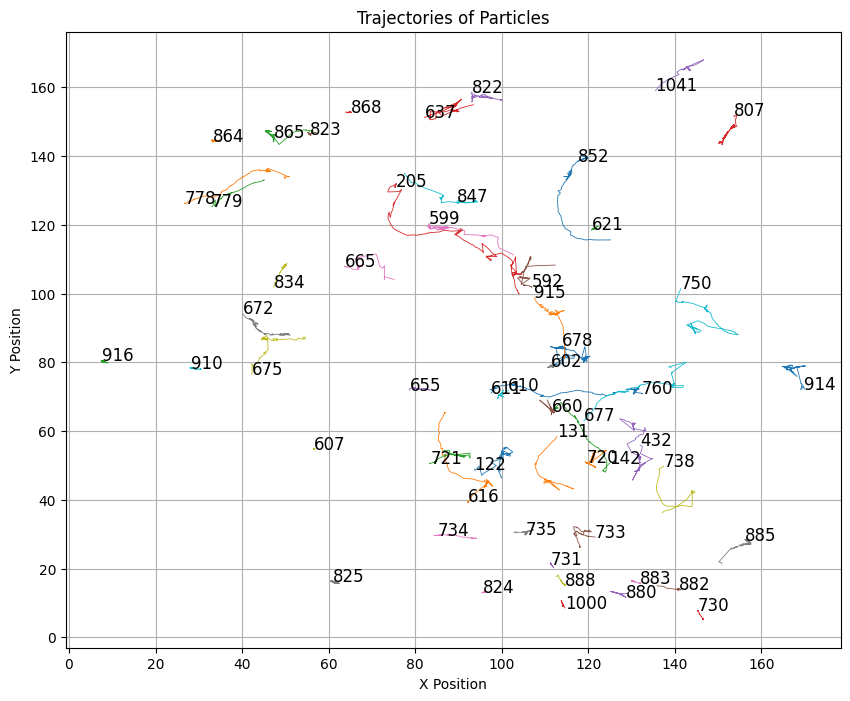

In [26]:
plt.figure(figsize=(10, 8))
# ppm = 4.8309
ppm = 1
# Plot the trajectories for each particle
for particle_id, group in t1.groupby('particle'):
    plt.plot(group['x']*ppm, group['y']*ppm, marker='o', markersize=0,lw=0.6)
    # Annotate the last position with the particle ID
    plt.text(group['x'].values[-1]*ppm, group['y'].values[-1]*ppm, str(particle_id), fontsize=12)

# Labeling the plot
plt.title('Trajectories of Particles')
plt.xlabel('X Position')
plt.ylabel('Y Position')
# plt.imshow(frames[0],cmap=plt.cm.grey)
# plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()